In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("D:/2nd Sem/Natural Language Processing/smsspamcollection (1).tsv" , sep = '\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df1 = df.drop(columns=['length', 'punct'])

In [6]:
df1.sample(5)

,label,message
3841,ham,HEY MATE! HOWS U HONEY?DID U AVE GOOD HOLIDAY?...
928,ham,K:)i will give my kvb acc details:)
3449,ham,Its &lt;#&gt; k here oh. Should i send home f...
4376,spam,Ur TONEXS subscription has been renewed and yo...
2022,ham,"I don't have anybody's number, I still haven't..."


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()


In [9]:
le.fit_transform(df1['label'])

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [10]:
df1['label'] = le.fit_transform(df1['label'])

In [11]:
df1.sample(5)

,label,message
1170,0,Msgs r not time pass.They silently say that I ...
5150,0,Happy new year to u and ur family...may this n...
1151,0,(That said can you text him one more time?)
4372,0,Purity of friendship between two is not about ...
683,0,Is xy going 4 e lunch?


In [12]:
df1.isnull().sum()

label      0
message    0
dtype: int64

In [13]:
df1.duplicated().sum()

np.int64(403)

In [14]:
df1 = df1.drop_duplicates(keep = 'first')

In [15]:
df1.duplicated().sum()

np.int64(0)

In [16]:
df1.shape

(5169, 2)

In [17]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df1['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x252d130ae40>,
 [Text(-1.014499732282844, 0.4251944181172162, 'Ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'Spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

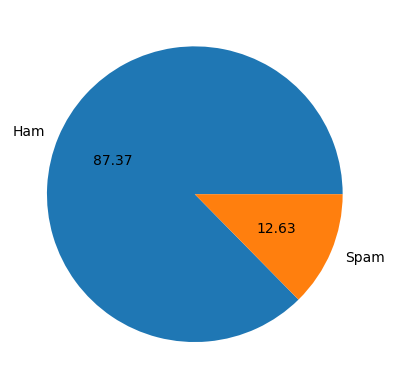

In [20]:
plt.pie(df1['label'].value_counts(), labels = ['Ham' , 'Spam'] , autopct = '%0.2f')

In [21]:
import nltk 

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\dhruv
[nltk_data]     joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df1['message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [24]:
df1['num_char'] = df['message'].apply(len)

In [25]:
df1.head()

,label,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df1['message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [27]:
df1['message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [28]:
df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))    

In [29]:
df1.head()

,label,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df1['message'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will ü b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [31]:
df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [32]:
df1.head()

,label,message,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df1[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344941,18.593538,1.974076
std,58.439256,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df1[df1['label'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.906333,17.267715,1.827724
std,56.717234,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df1[df1['label'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


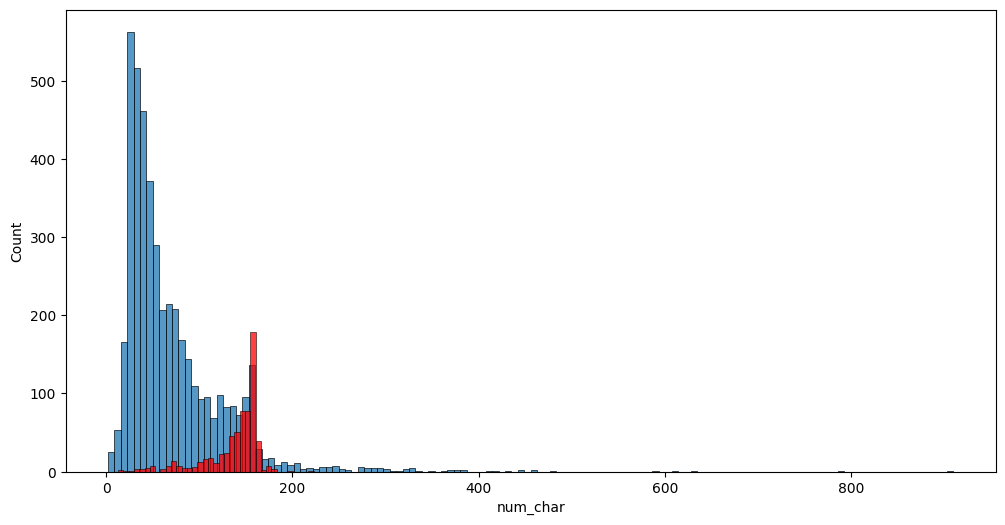

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(12 , 6))
sns.histplot(df1[df1['label'] == 0 ]['num_char'])
sns.histplot(df1[df1['label'] == 1 ]['num_char'] , color= 'r')
plt.show()

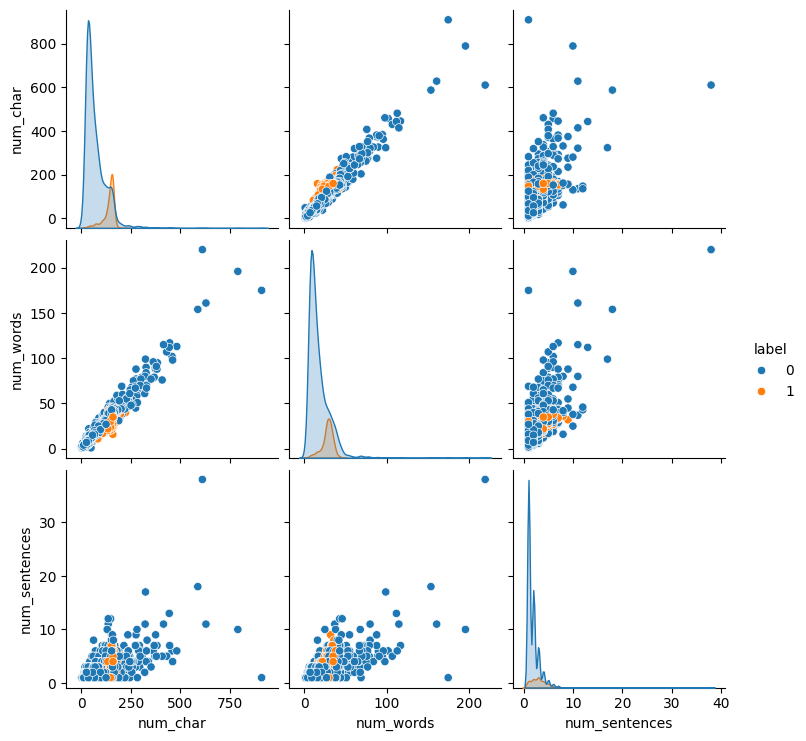

In [39]:
sns.pairplot(df1 , hue = 'label')

In [40]:
df2 = df1.drop(columns = ['message'])

In [41]:
df2

,label,num_char,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,160,35,4
5568,0,36,9,1
5569,0,57,15,2
5570,0,125,27,1


In [42]:
df2.corr()

,label,num_char,num_words,num_sentences
label,1.000000,0.379777,0.260168,0.263826
num_char,0.379777,1.000000,0.966002,0.622566
num_words,0.260168,0.966002,1.000000,0.679142
num_sentences,0.263826,0.622566,0.679142,1.000000


<Axes: >

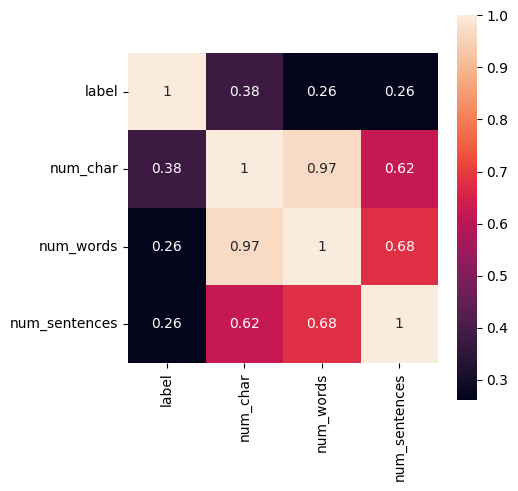

In [43]:
plt.figure(figsize = (5 , 5))
sns.heatmap(df2.corr() , annot = True  , square = True)